In [7]:
%matplotlib inline
from matplotlib import gridspec

import re
import math
import os.path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from miran import *

sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 5); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

def get_scores_from_xlsx(list_of_excel_files):
    
    cor = []
    nei = []
    rel = []
    wei = [] 
    par = []

    for f in list_of_excel_files:
        df = pd.read_excel(f, sheetname=3).T
        cor.append(float(df.correct))
        nei.append(float(df.fifth))
        rel.append(float(df.relative))
        par.append(float(df.parallel))
        wei.append(float(df.weighted))
    return [cor, nei, rel, par, wei]


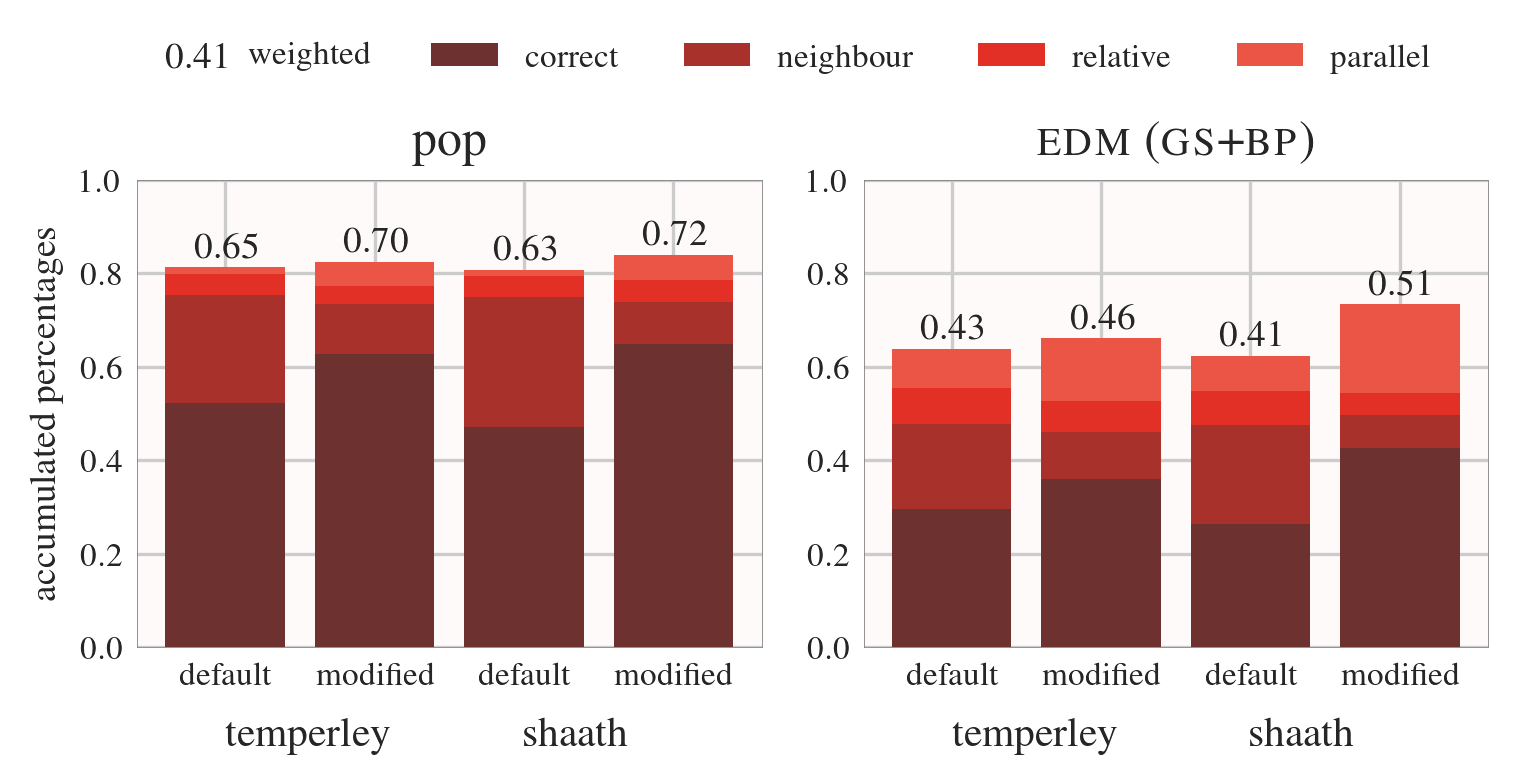

In [11]:
# COMPARISON 1

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEDEF-TEMPERLEY.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-TEMPERLEY.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEDEF-SHAATH.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-SHAATH.xlsx'])
cor, nei, rel, par, wei = a

plt.subplot(1,2,1)
plt.title("pop")
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('default', 'modified', 'default', 'modified'))
plt.text(0, -0.21, 'temperley', fontsize=10)
plt.text(2.,-0.21,  'shaath', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)
plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)


a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEDEF-TEMPERLEY.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-TEMPERLEY.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEDEF-SHAATH.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-SHAATH.xlsx'])

cor, nei, rel, par, wei = a
plt.subplot(1,2,2)
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{bp})")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('default', 'modified', 'default', 'modified'))
plt.text(0.0, -0.21, 'temperley', fontsize=10)
plt.text(2.0,-0.21,  'shaath', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_1.pdf', format="pdf", dpi=1200, bbox_inches='tight')

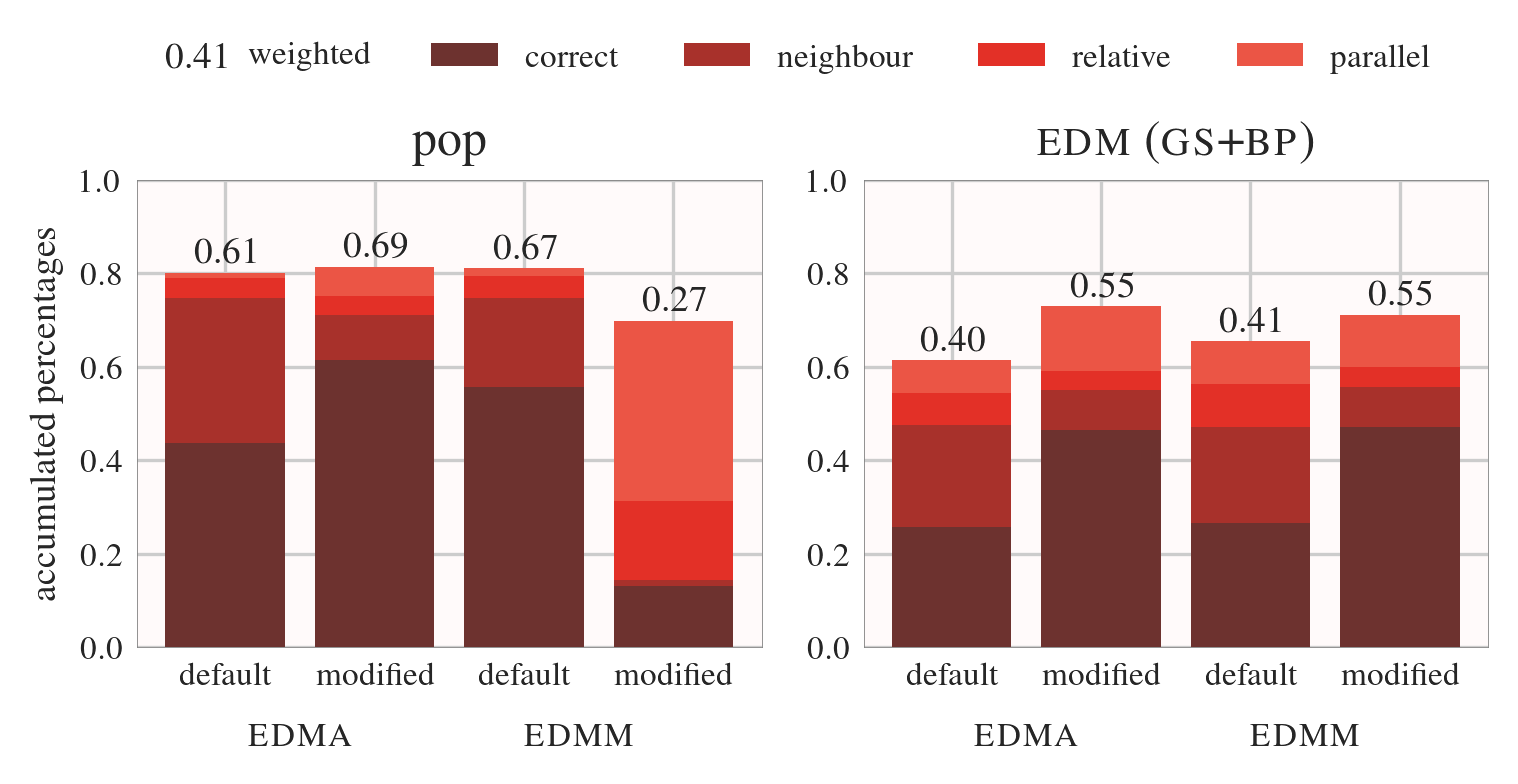

In [23]:
# COMPARISON 2

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEDEF-EDMA.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-EDMA.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEDEF-EDMM.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-EDMM.xlsx'])

plt.subplot(1,2,1)
cor, nei, rel, par, wei = a
plt.title('pop')
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('default', 'modified', 'default', 'modified'))

plt.text(0.15, -0.21, r'\textsc{edma}', fontsize=10)
plt.text(2,-0.21,  r'\textsc{edmm}', fontsize=10)

#plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)


a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEDEF-EDMA.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-EDMA.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEDEF-EDMM.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-EDMM.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{bp})")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('default', 'modified', 'default', 'modified'))
plt.text(0.15, -0.21, r'\textsc{edma}', fontsize=10)
plt.text(2,-0.21,  r'\textsc{edmm}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_2.pdf', format="pdf", dpi=1200, bbox_inches='tight')

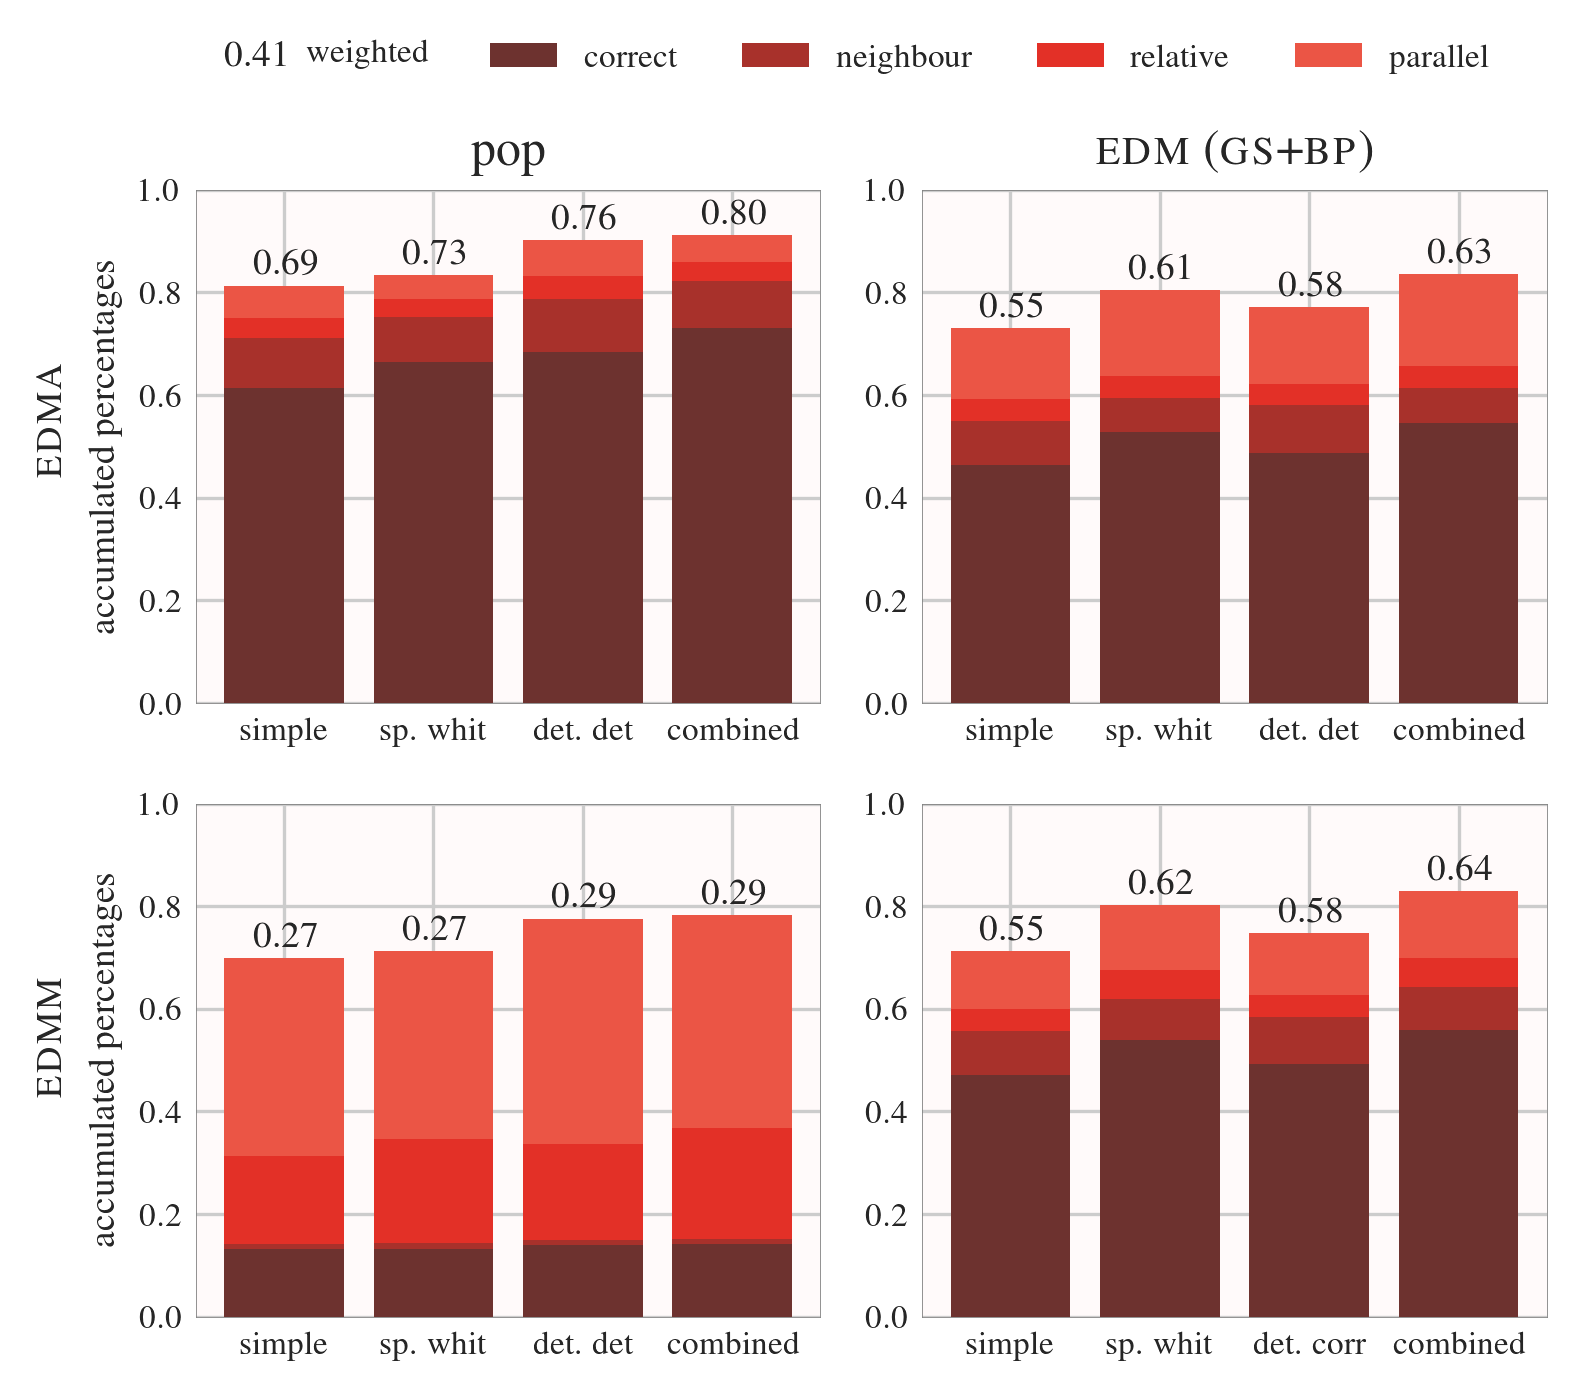

In [21]:
# COMPARISON 3

plt.figure(figsize=(5.16, 4.4), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-EDMA.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-SW-EDMA.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-DC-EDMA.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-FINAL-EDMA.xlsx'])
cor, nei, rel, par, wei = a
plt.subplot(2,2,1)
plt.title('pop')
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('simple', 'sp. whit', 'det. det', 'combined'))
plt.text(-1.7, 0.6, r'\textsc{edma}', fontsize=11, rotation=90)
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)





a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-EDMA.xlsx', 
                         '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-SW-EDMA.xlsx', 
                         '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-DC-EDMA.xlsx',
                         '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-FINAL-EDMA.xlsx'])

plt.subplot(2,2,2)
cor, nei, rel, par, wei = a
plt.title(r"\textsc{edm} (\textsc{gs}+\textsc{bp})")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('simple', 'sp. whit', 'det. det', 'combined'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)
    

    
    
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-BASEMOD-EDMM.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-SW-EDMM.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-DC-EDMM.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-POP-FINAL-EDMM.xlsx'])


plt.subplot(2,2,3)
cor, nei, rel, par, wei = a
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.text(-1.7, 0.6, r'\textsc{edmm}', fontsize=11, rotation=90)
plt.xticks(range(len(a[0])), ('simple', 'sp. whit', 'det. det', 'combined'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)
    
    
    
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-BASEMOD-EDMM.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-SW-EDMM.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-DC-EDMM.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-EDM-FINAL-EDMM.xlsx'])


plt.subplot(2,2,4)
cor, nei, rel, par, wei = a
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('simple', 'sp. whit', 'det. corr', 'combined'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_3.pdf', format="pdf", dpi=1200, bbox_inches='tight')

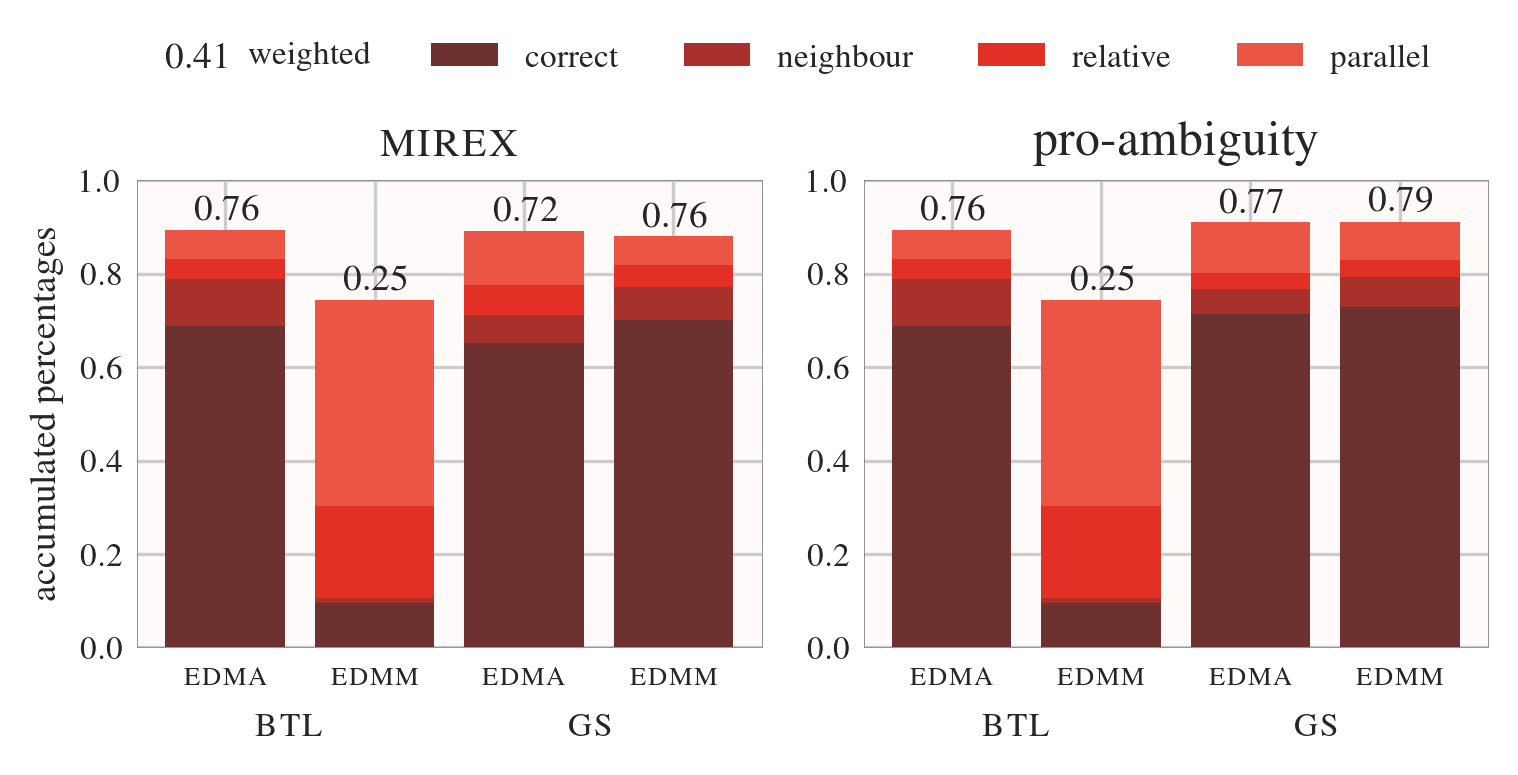

In [27]:
# COMPARISON 4

plt.figure(figsize=(5.16, 2.2), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-BTL-FINAL-EDMA-MIREX.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-BTL-FINAL-EDMM-MIREX.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-GS-FINAL-EDMA-MIREX.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-GS-FINAL-EDMM-MIREX.xlsx'])

plt.subplot(1,2,1)
cor, nei, rel, par, wei = a
plt.title(r'\textsc{mirex}')
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), (r'\textsc{edma}', r'\textsc{edmm}', r'\textsc{edma}', r'\textsc{edmm}'))
plt.text(0.2,-0.19,  r'\textsc{btl}', fontsize=10)
plt.text(2.3,-0.19,  r'\textsc{gs}', fontsize=10)

#plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-BTL-FINAL-EDMA-MIREX.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-BTL-FINAL-EDMM-MIREX.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-GS-FINAL-EDMA-AMBI.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/ECIR-GS-FINAL-EDMM-AMBI.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title("pro-ambiguity")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), (r'\textsc{edma}', r'\textsc{edmm}', r'\textsc{edma}', r'\textsc{edmm}'))
plt.text(0.2,-0.19,  r'\textsc{btl}', fontsize=10)
plt.text(2.3,-0.19,  r'\textsc{gs}', fontsize=10)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_4.pdf', format="pdf", dpi=1200, bbox_inches='tight')